### 第一题

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from yellowbrick import ROCAUC

In [46]:
from matplotlib_inline import backend_inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rcParams['font.family'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False
backend_inline.set_matplotlib_formats('png', dpi=1000)

In [47]:
data = pd.read_csv(r'data/Demo3/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [48]:
class_name = data['class'].unique()
class_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
X, y = data.iloc[:, : 4], data.iloc[:, 4]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X=x_train, y=y_train)
y_test_pre = model.predict(x_test)
print(y_test_pre)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [52]:
num = X.shape[0] #样本总数
num_train = x_train.shape[0] #训练集样本数目
num_test = num - num_train #测试集样本数目
acc = sum(y_test_pre == y_test) / num_test
print('The accuracy is ', acc)

The accuracy is  0.9777777777777777


In [53]:
f"准确率：{model.score(x_test, y_test)}"

'准确率：0.9777777777777777'

交叉验证：0.9533333333333334 +/- (0.06798692684790378)


d:\Miniconda\envs\PyBase\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


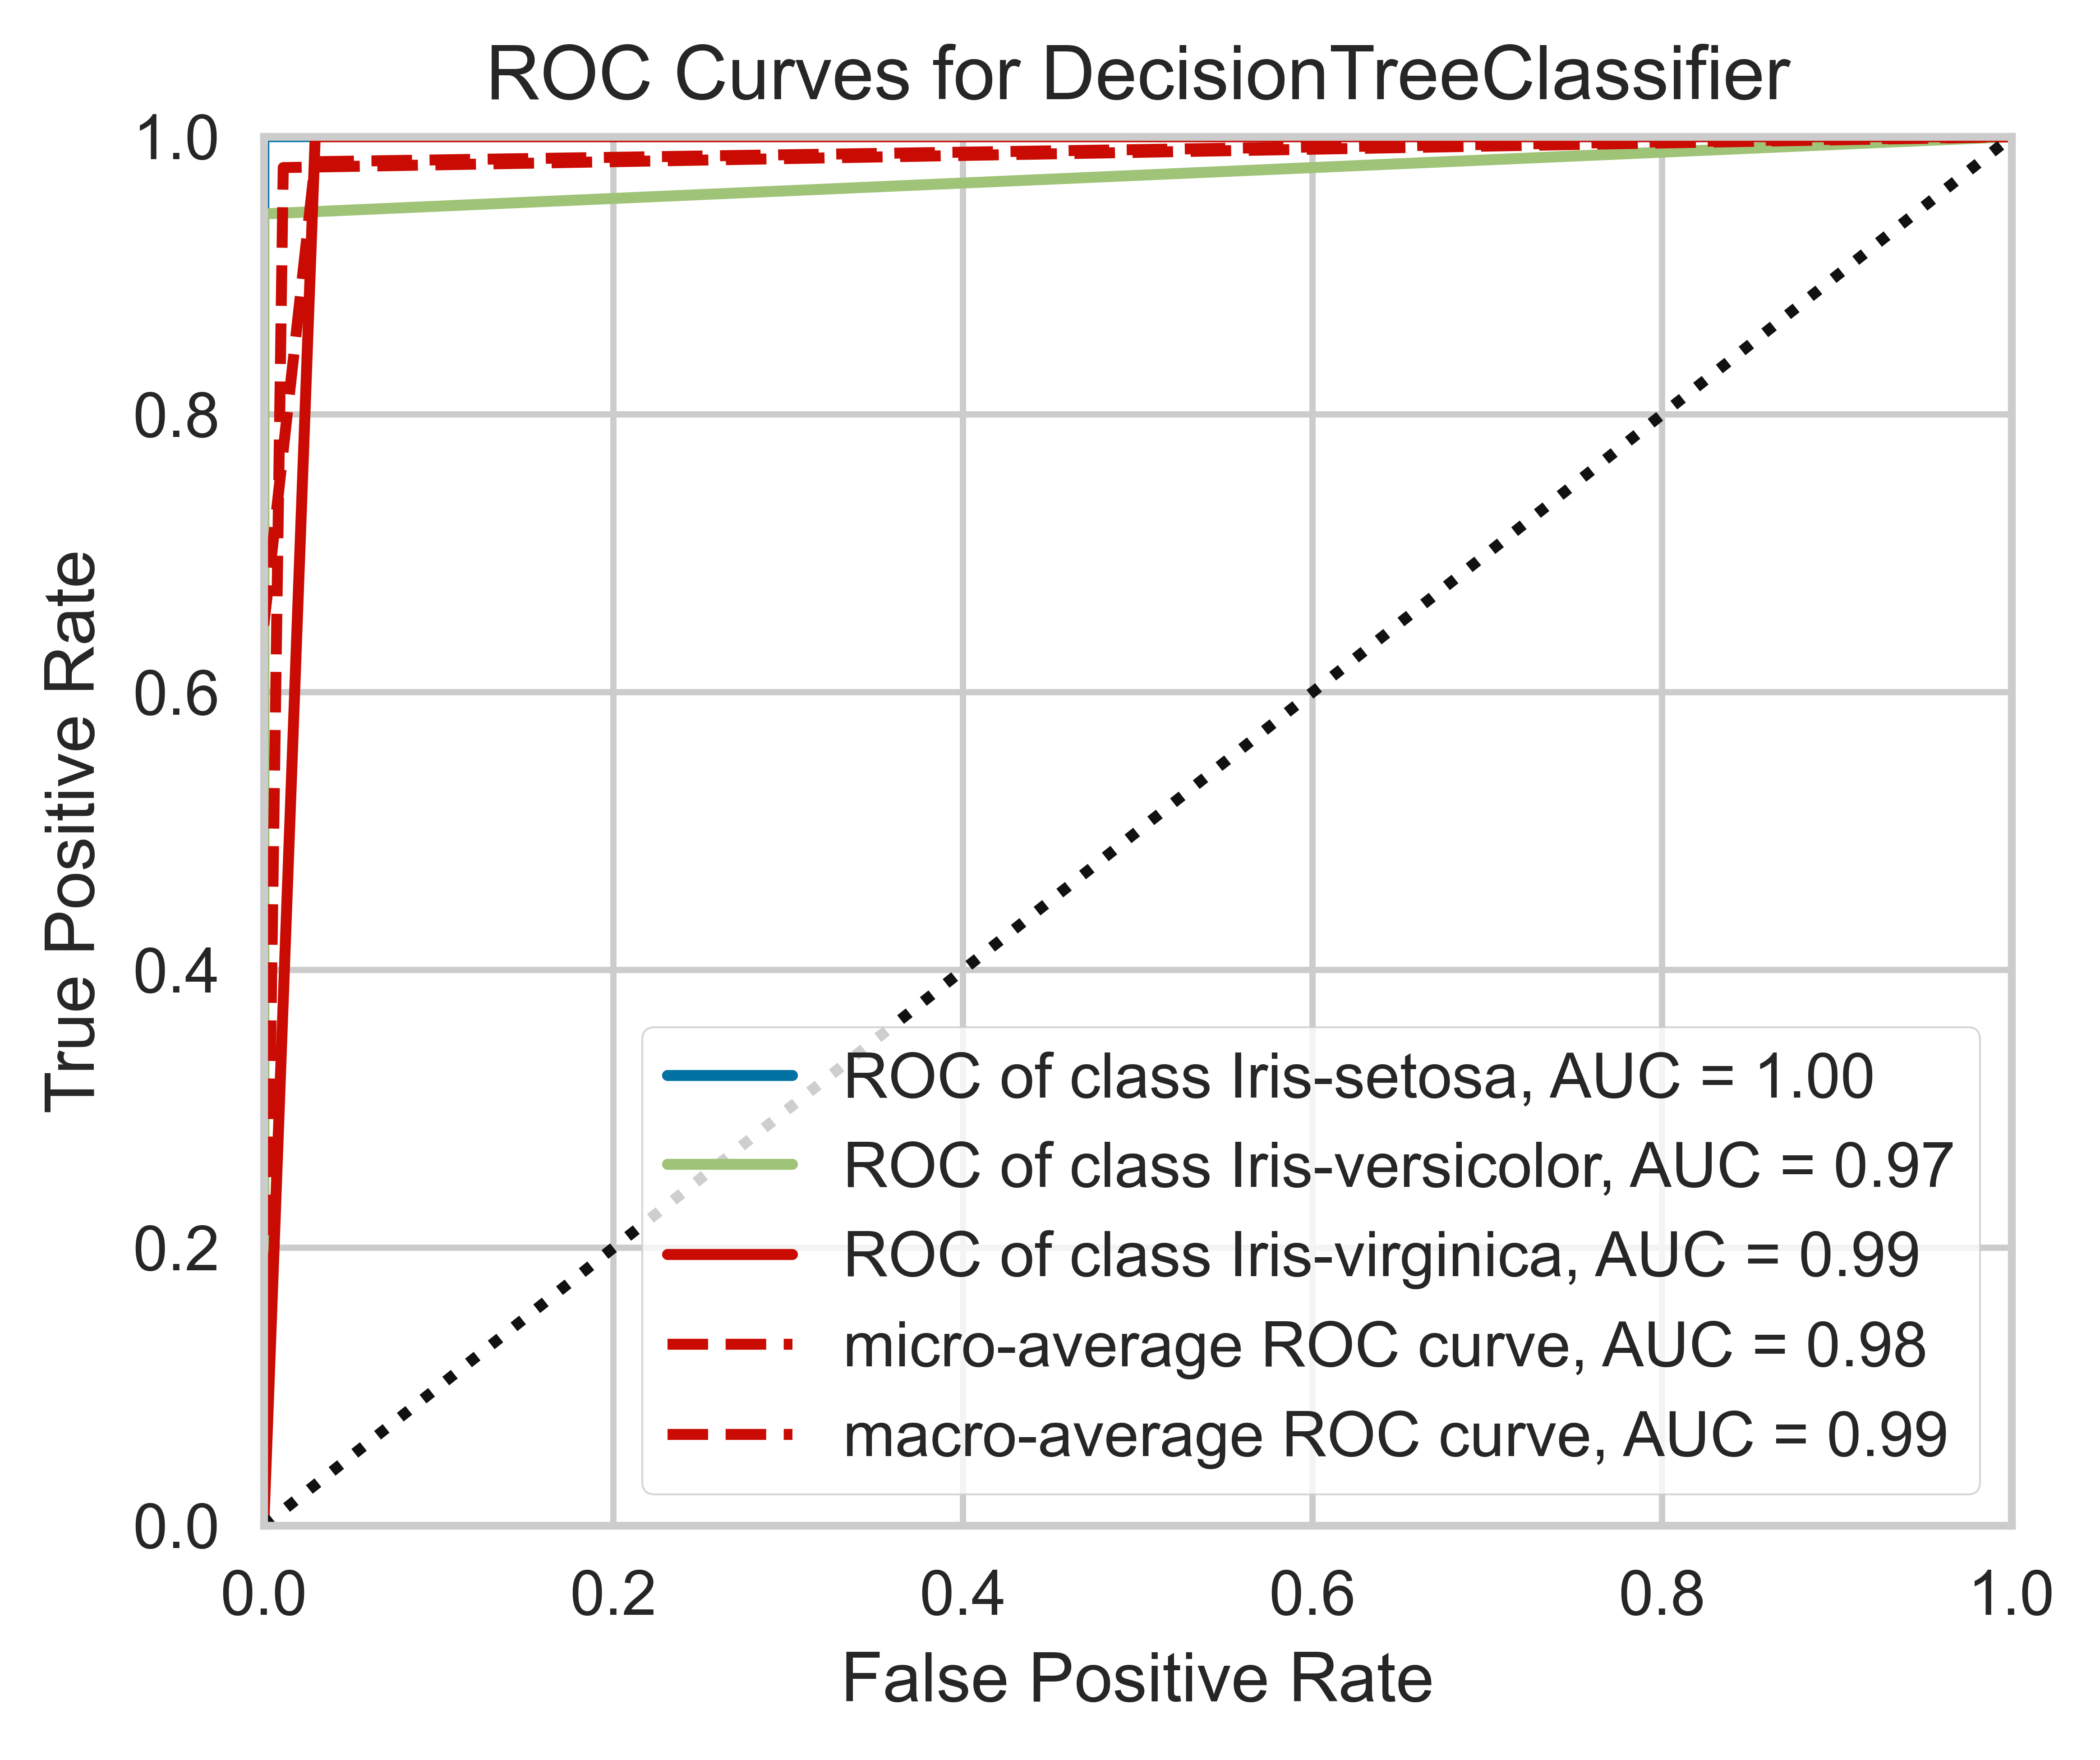

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(criterion='entropy'))

In [54]:
scores = cross_val_score(model, X, y, cv=5)
print(f"交叉验证：{scores.mean()} +/- ({scores.std() * 2})")

from yellowbrick.classifier import roc_auc
fig = plt.figure(figsize=(5, 4))
roc_auc(model, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test)

### 第二题

In [55]:
data = pd.read_csv(r'data/Demo3/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [56]:
X, y = data.iloc[:, : 4], data.iloc[:, 4]
X, y = X.reset_index(drop=True).values, y.reset_index(drop=True).values

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

epoch: 1


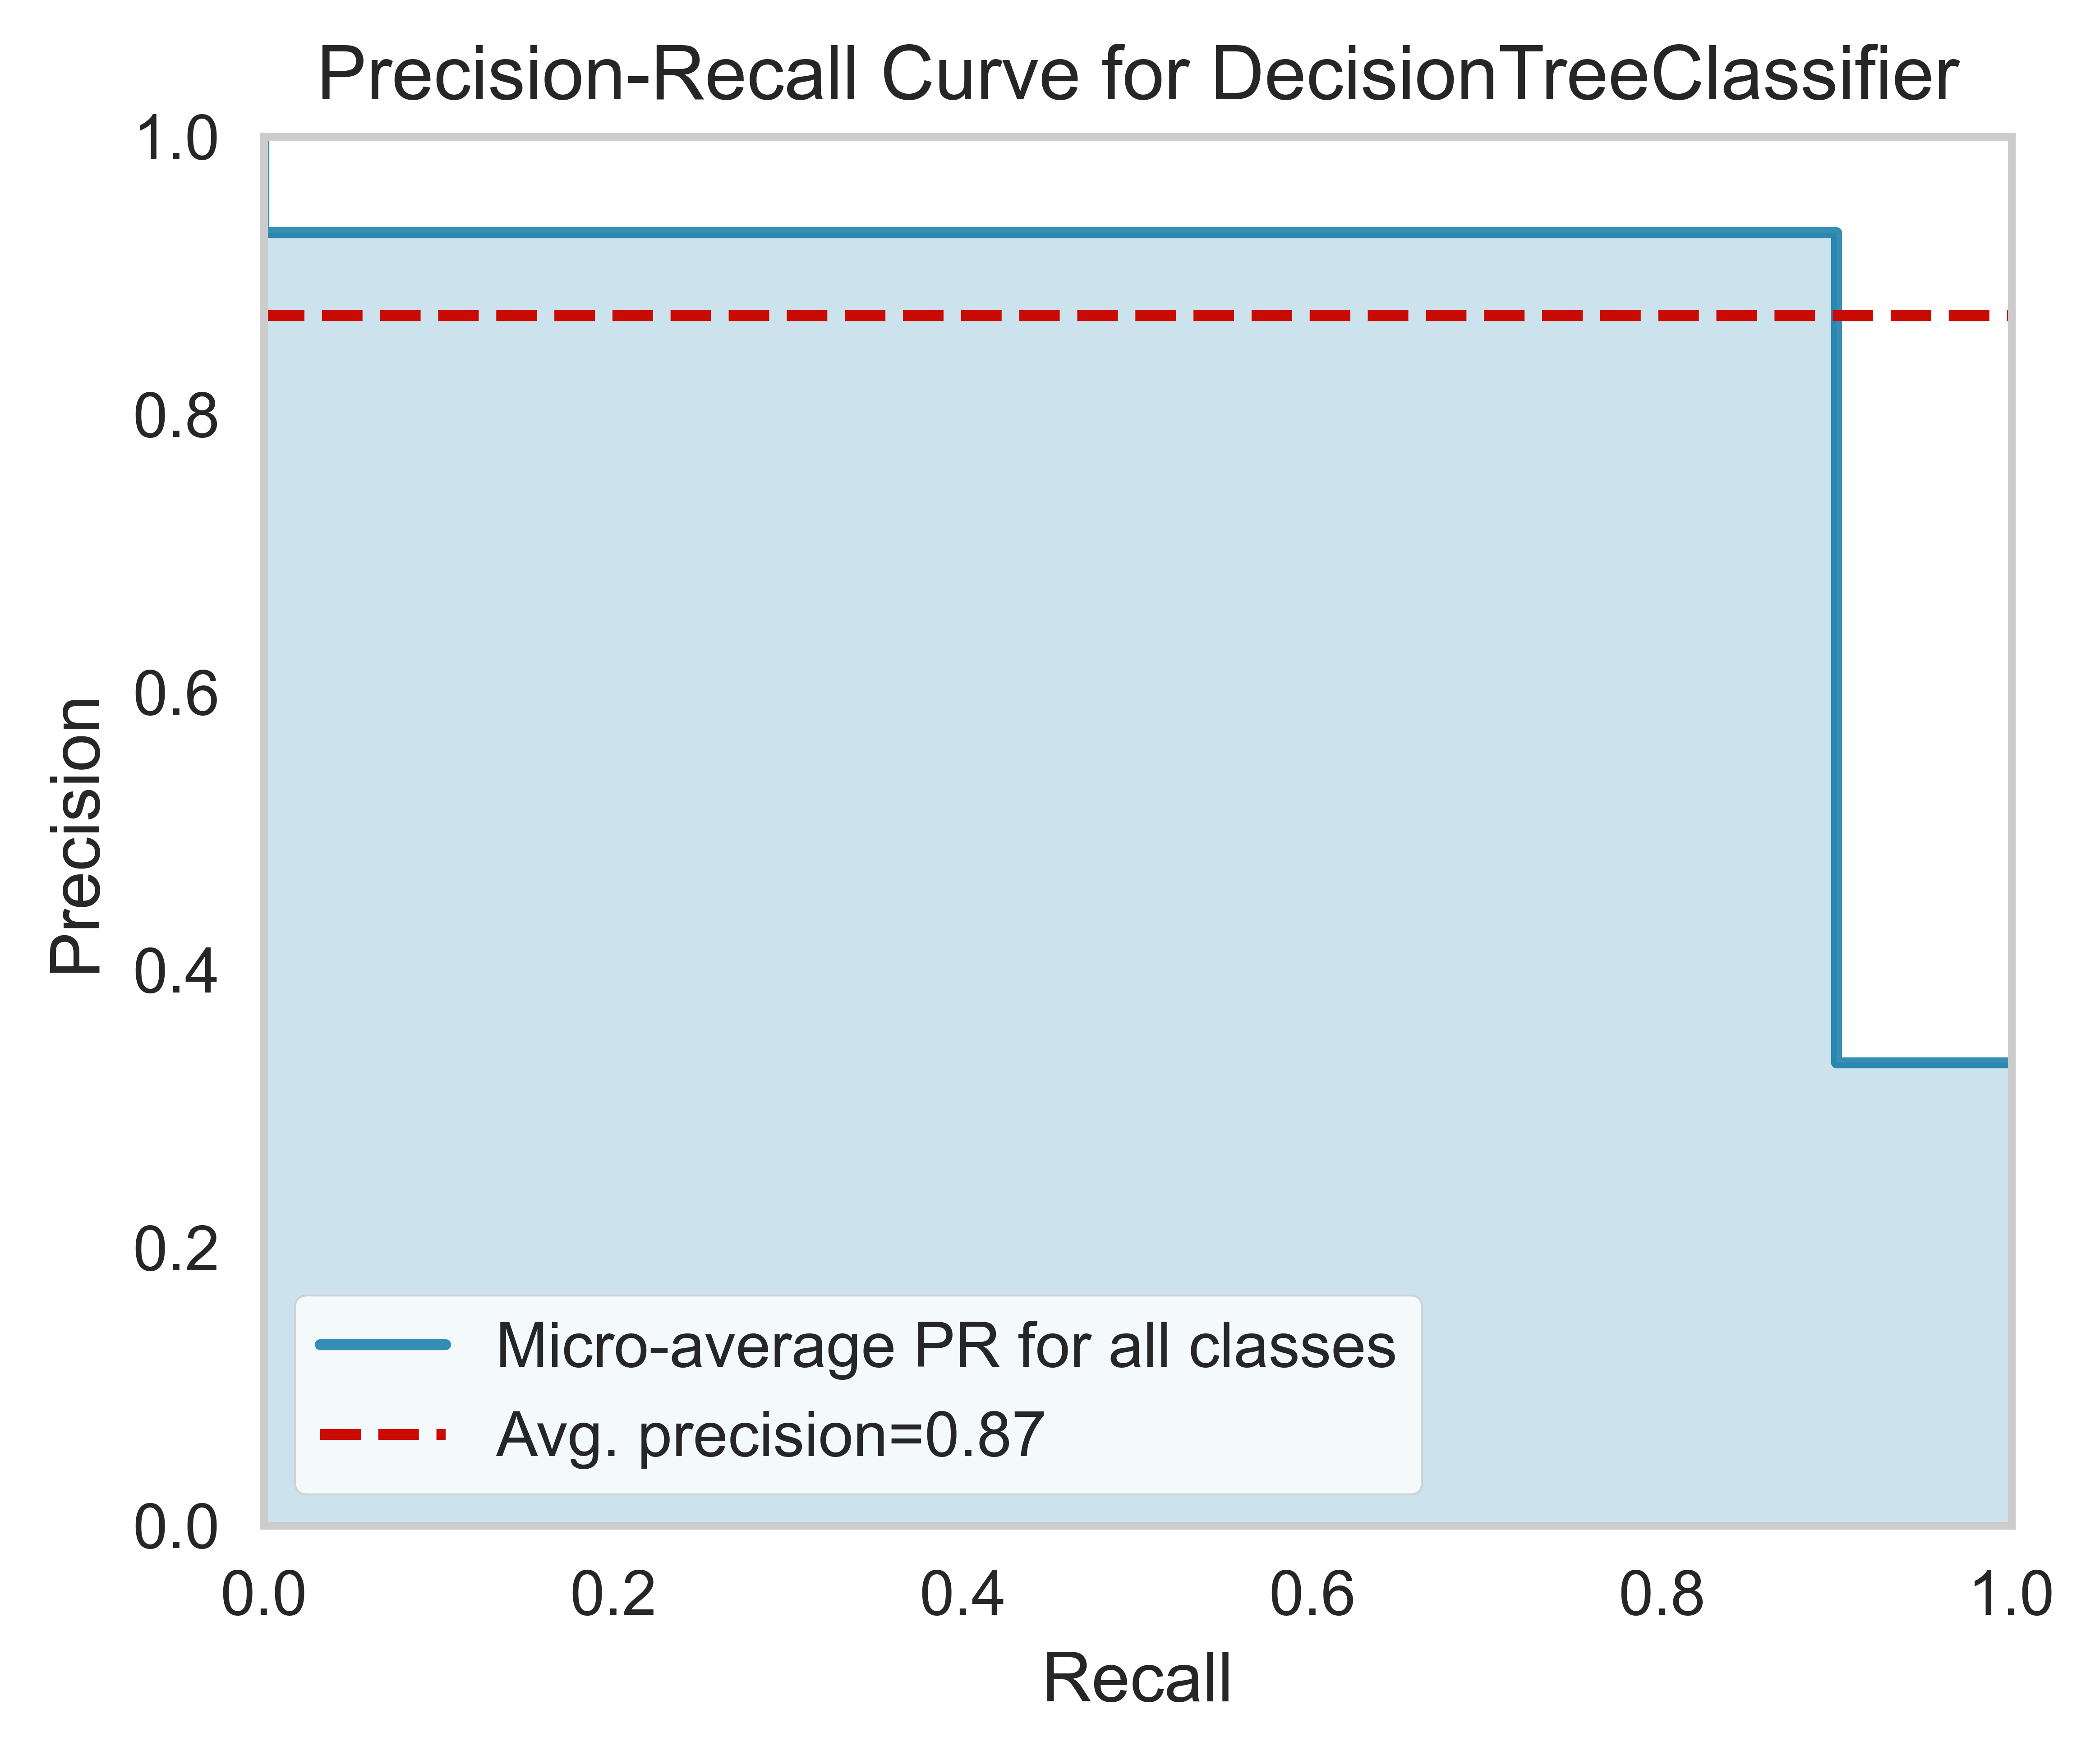

epoch: 2


epoch: 3


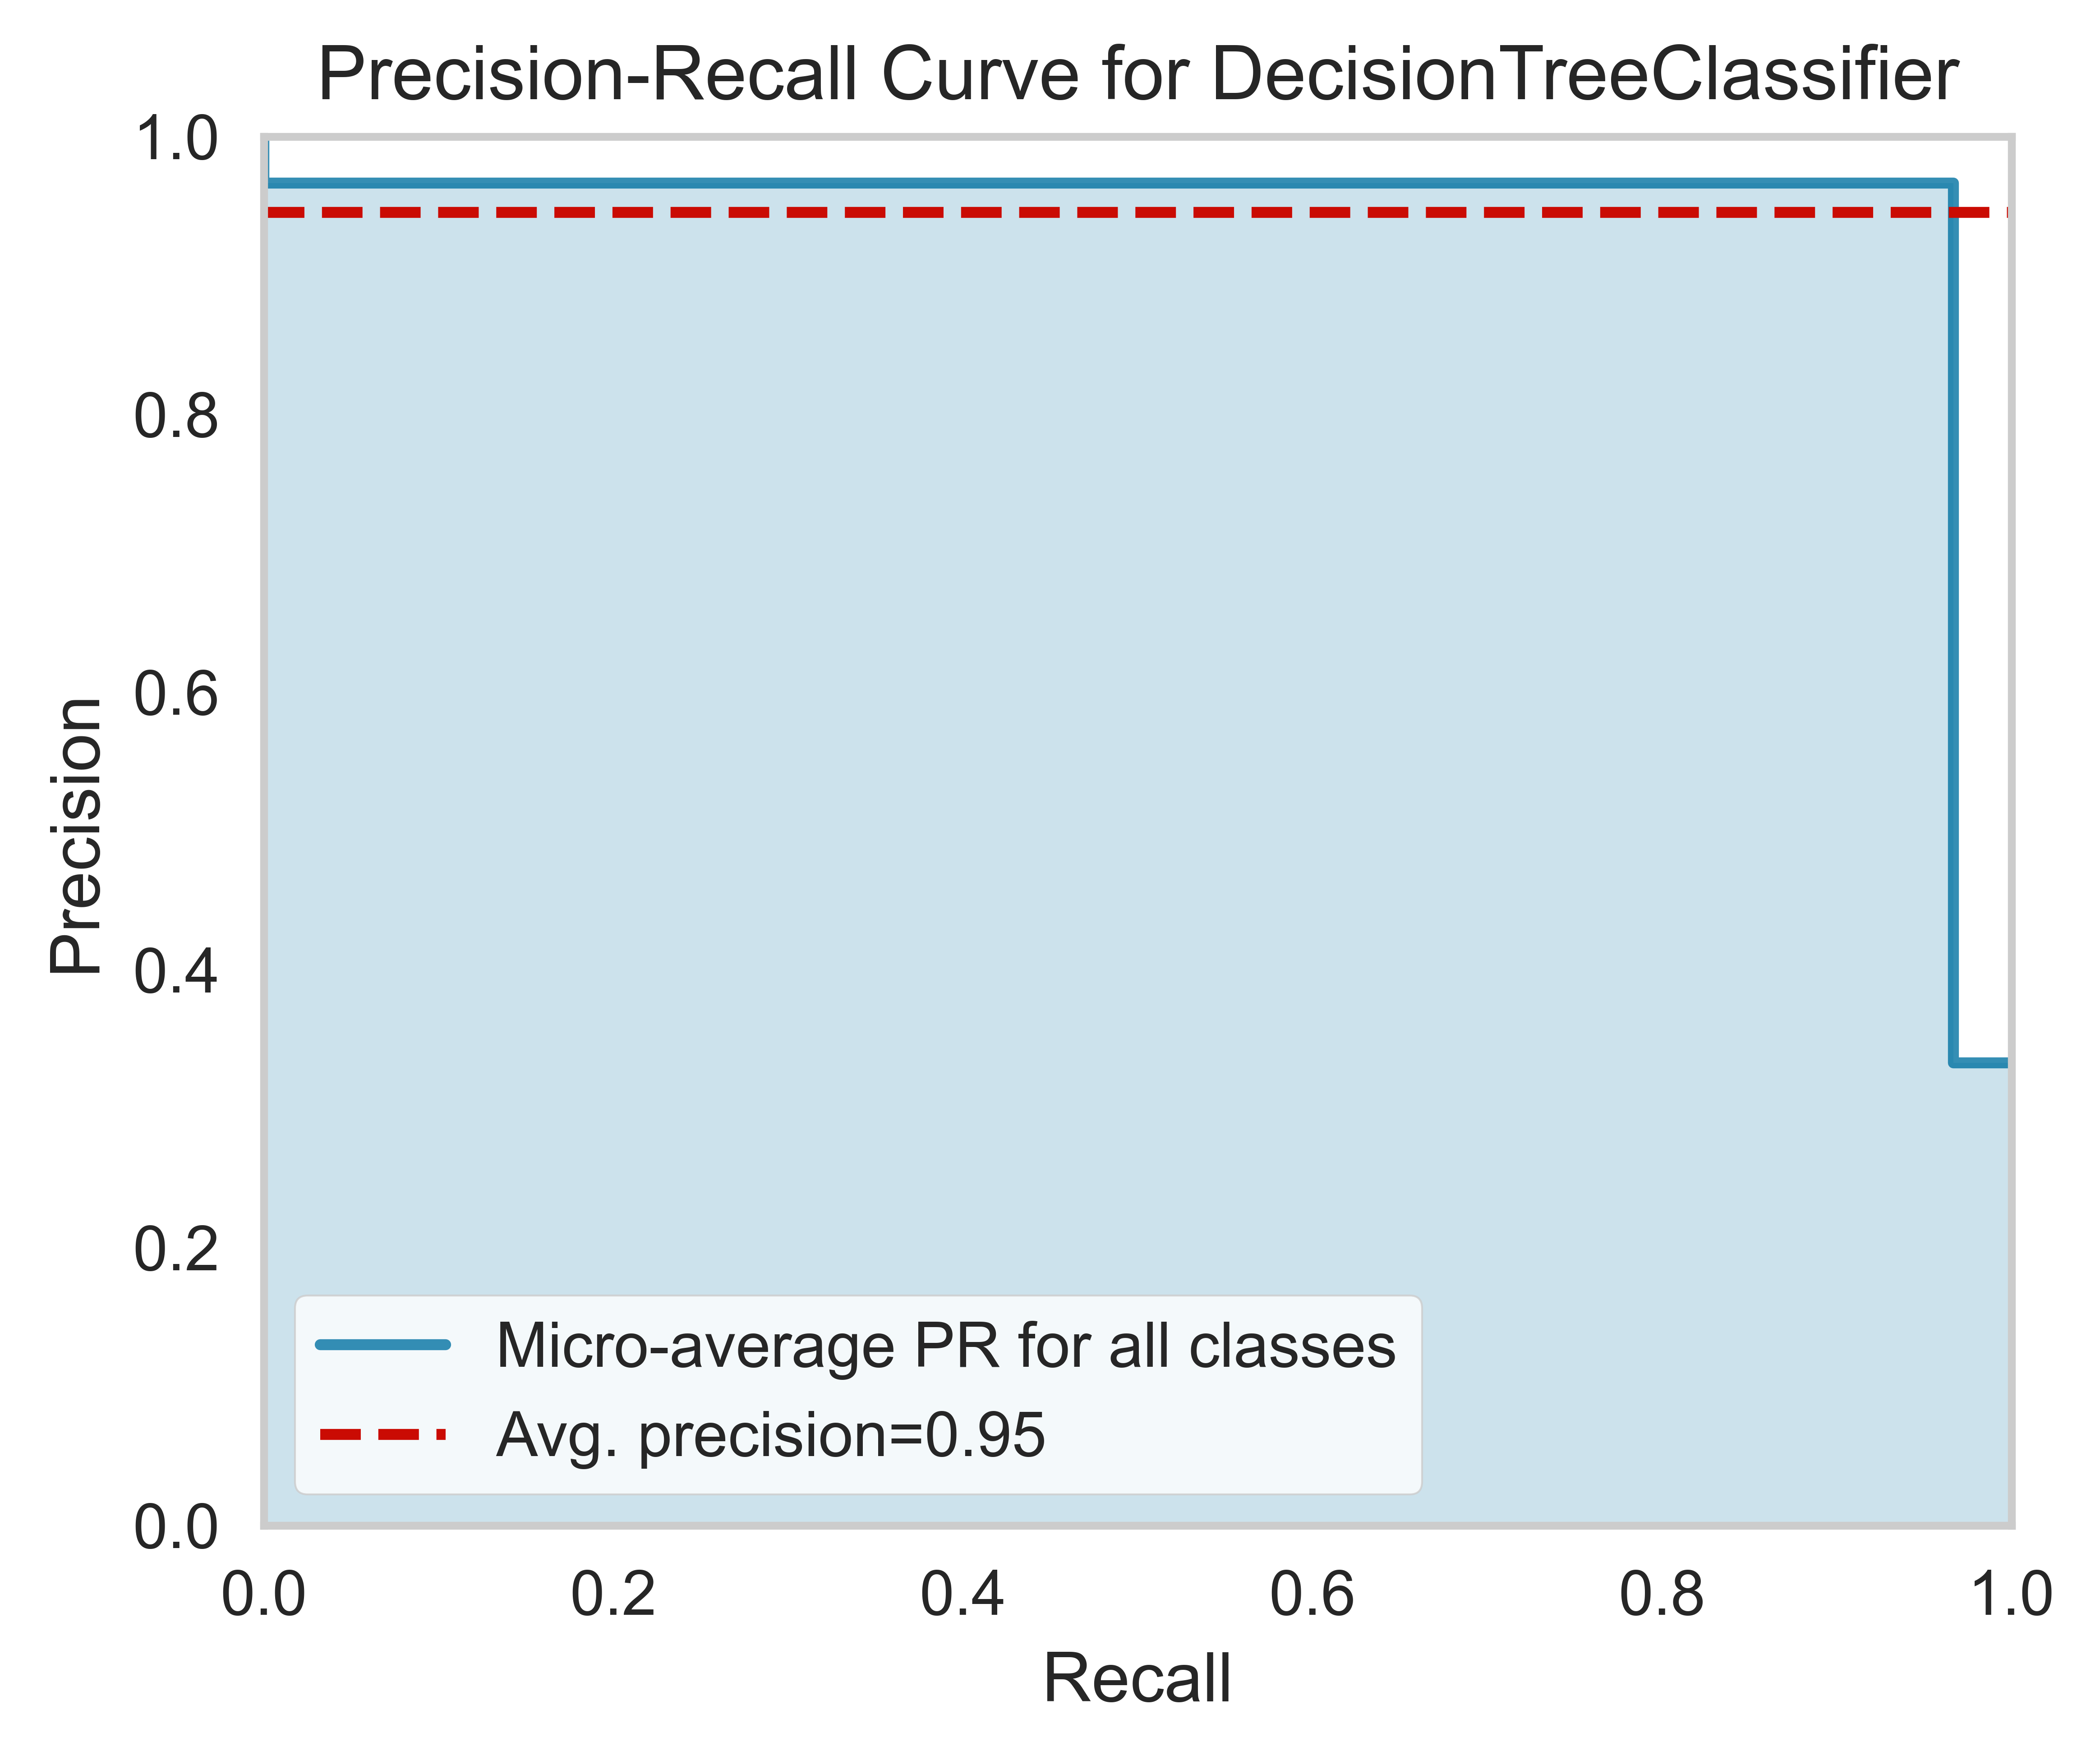

epoch: 4


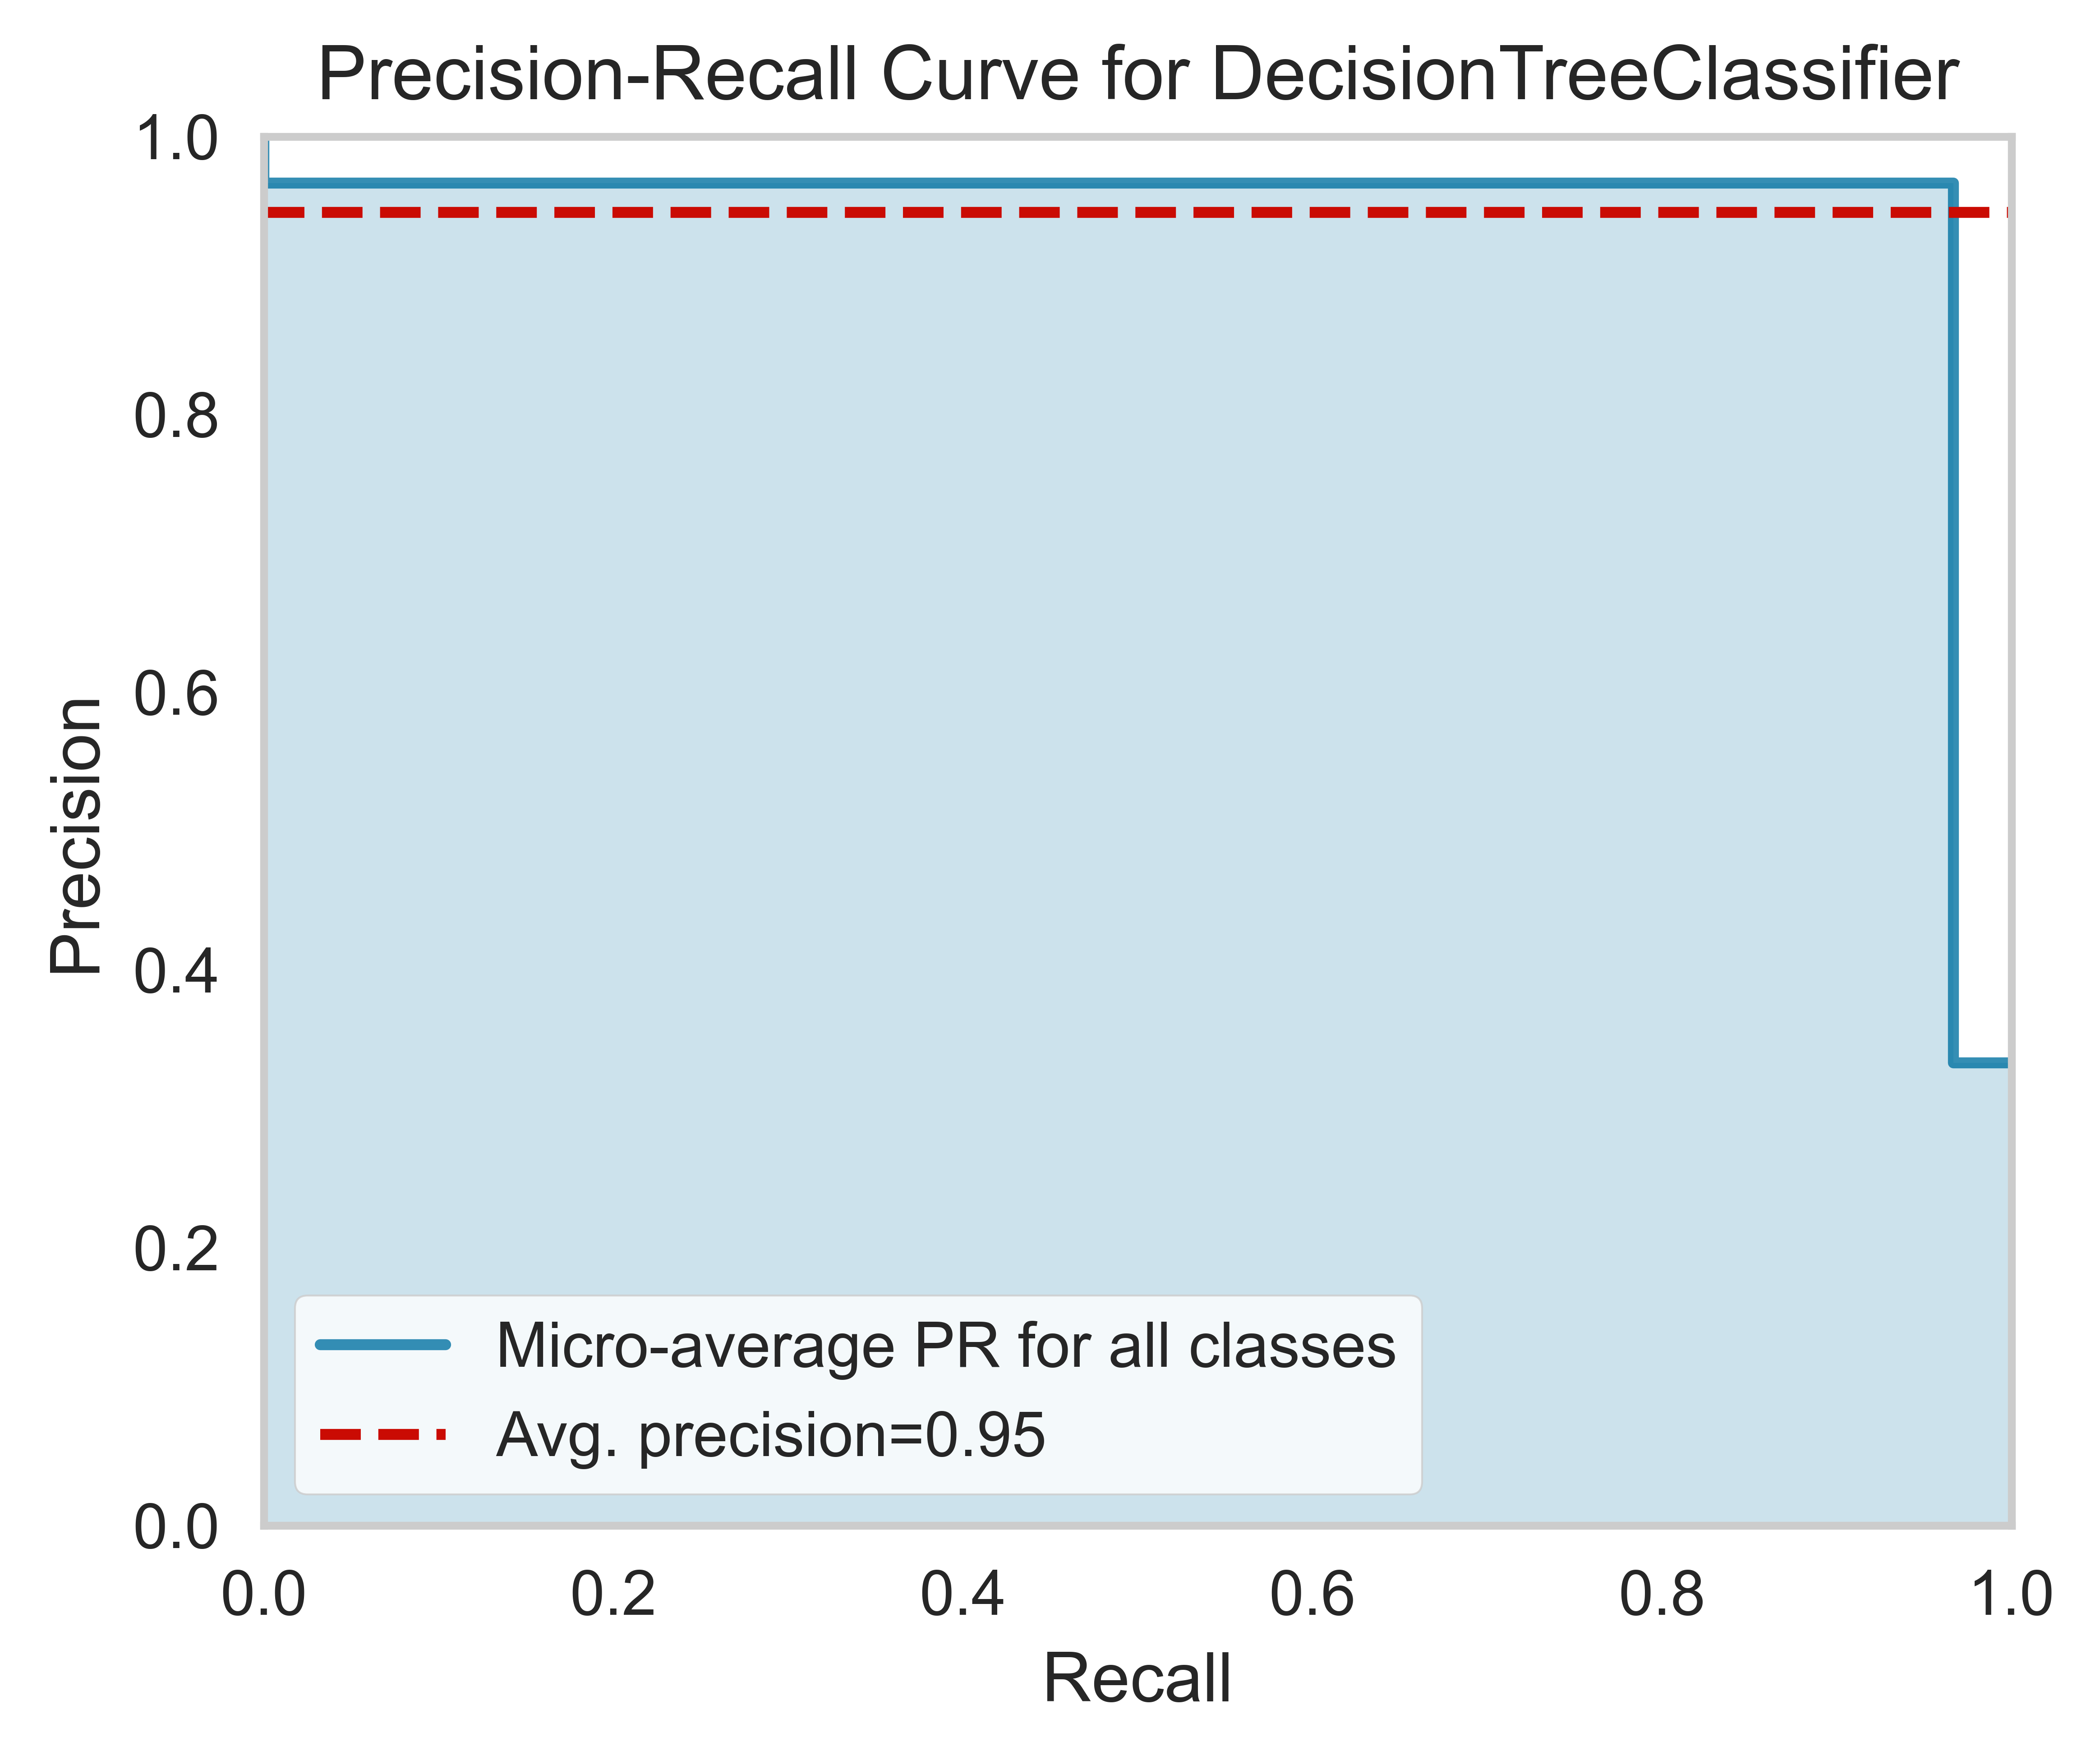

epoch: 5


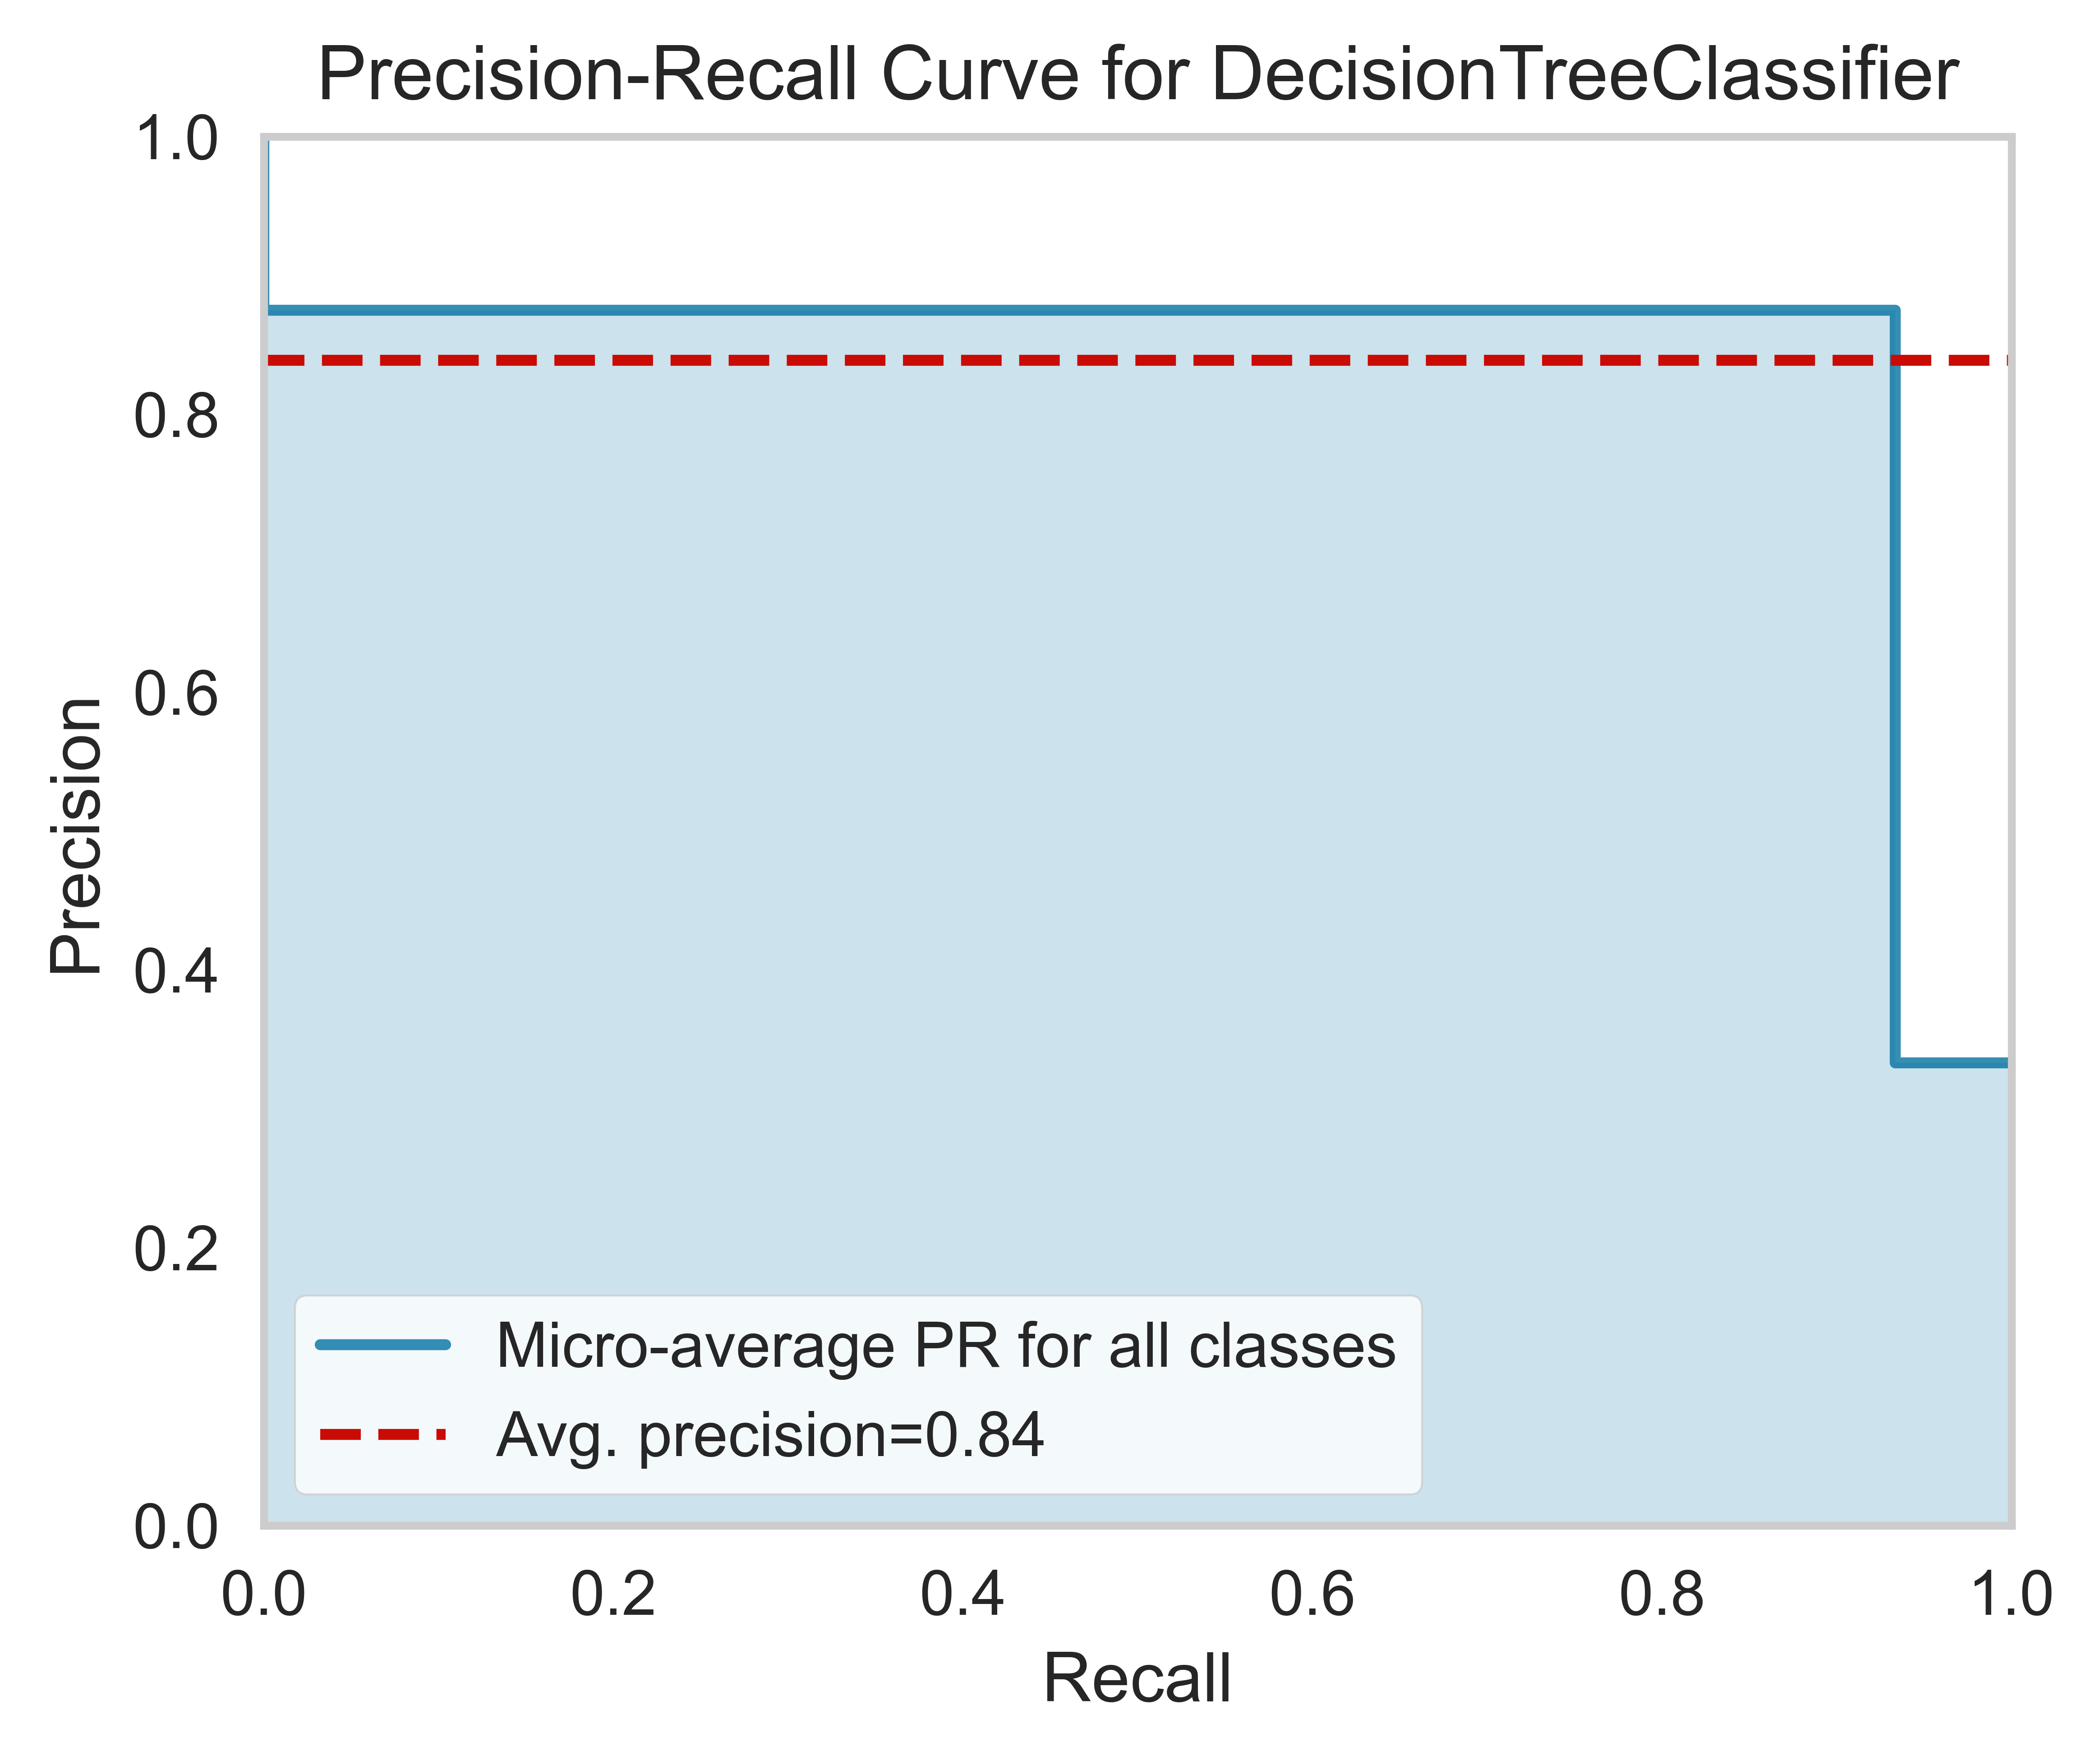

In [58]:
kf = RepeatedKFold(n_splits=5, n_repeats=1)
for i, (train, test) in enumerate(kf.split(X, y)):
    fig = plt.figure(figsize=(5, 4))
    print(f"epoch: {i + 1}")
    model = DecisionTreeClassifier(criterion='gini')
    visualizer = PrecisionRecallCurve(model)
    visualizer.fit(X[train], y[train])
    visualizer.score(X[test], y[test])   
    visualizer.show()

epoch: 1


epoch: 2


epoch: 3


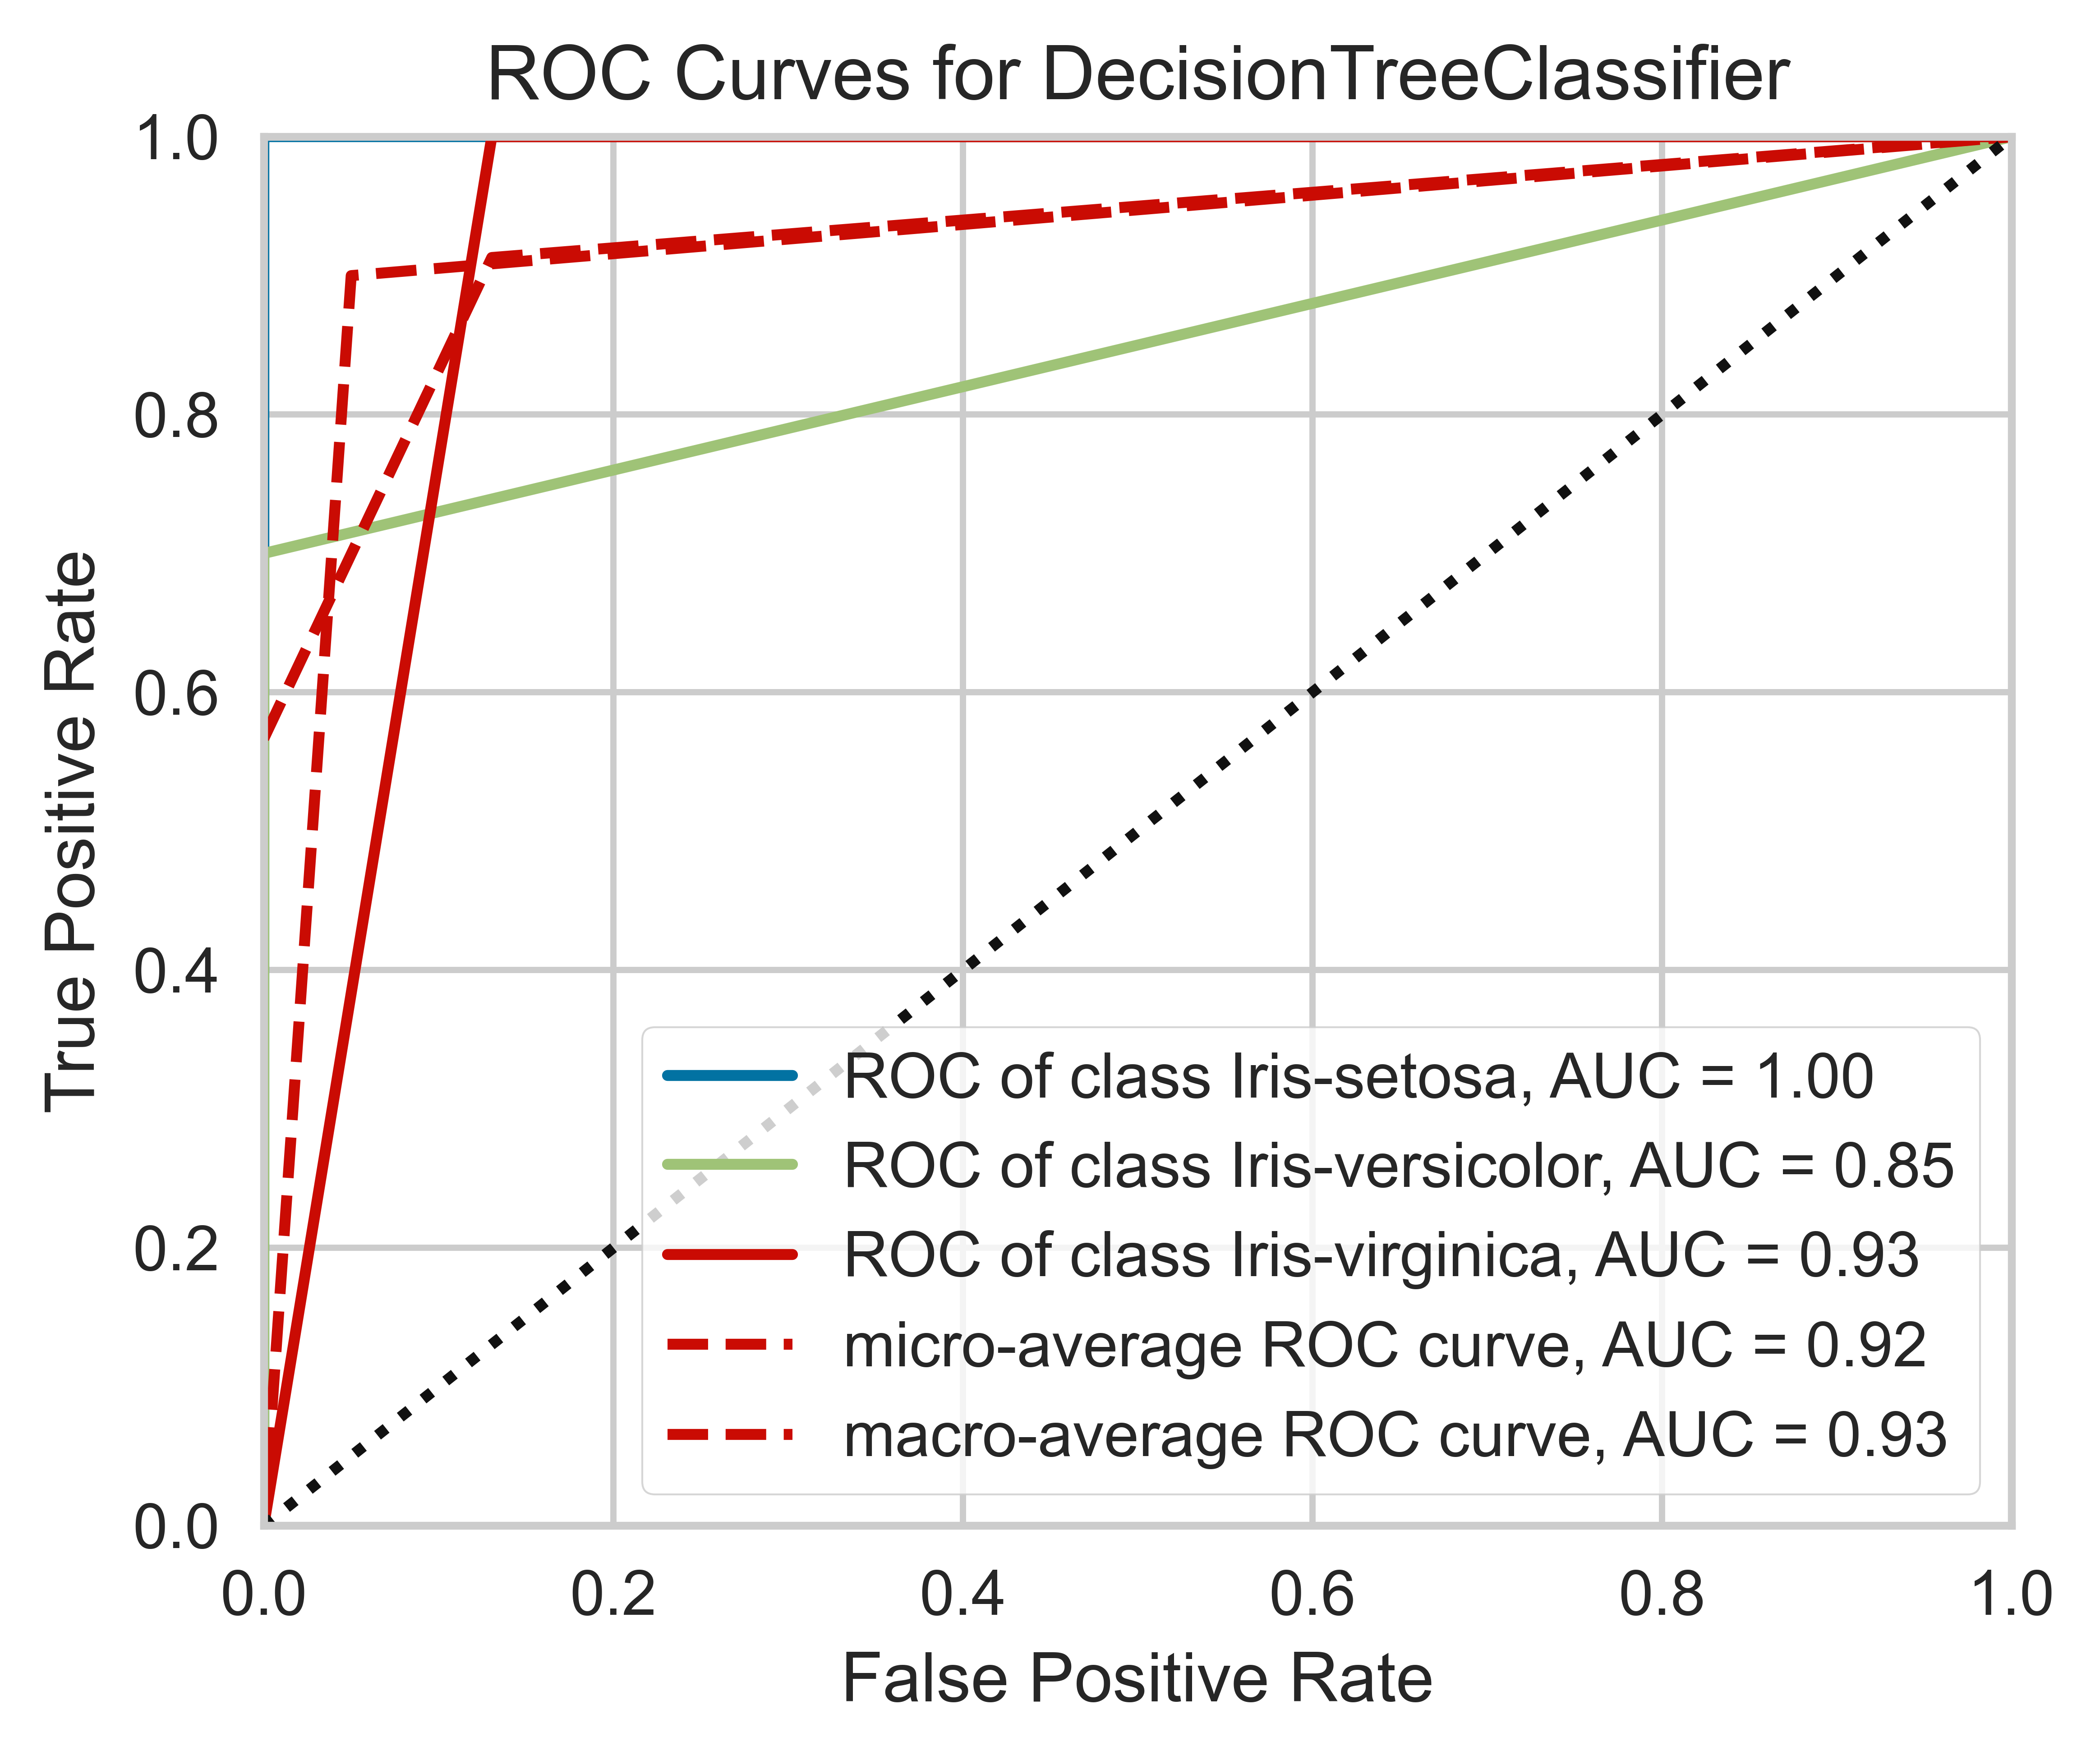

epoch: 4


epoch: 5


In [59]:
kf = RepeatedKFold(n_splits=5, n_repeats=1)
for i, (train, test) in enumerate(kf.split(X, y)):
    print(f"epoch: {i + 1}")
    fig = plt.figure(figsize=(5, 4))
    model = DecisionTreeClassifier(criterion='gini')       
    visualizer1 = ROCAUC(model, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    visualizer1.fit(X[train], y[train])
    visualizer1.score(X[test], y[test])
    visualizer1.show()